<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana6/VentasDiasPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [8]:
np.random.seed(42)
idx = pd.date_range('2025-08-01',periods=24*30, freq='H')
ventas = 100 + 10*np.sin(2*np.pi*idx.hour/24) + np.random.normal(0,10,len(idx))

df = pd.DataFrame({'FechaHora': idx, 'Ventas':ventas})
df['Hora'] = df['FechaHora'].dt.hour
df['DiaSemana'] = df['FechaHora'].dt.dayofweek
#df

/tmp/ipython-input-3132652952.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range('2025-08-01',periods=24*30, freq='H')


In [11]:
# Como se hace con pandas
df['SMA_3'] = df['Ventas'].shift(1).rolling(3).mean()
# Lags
df['lag1'] = df['Ventas'].shift(1)

# Codificacion ciclica de la hora
df['Hora_sin'] = np.sin(2*np.pi*df['Hora']/24)
df['Hora_cos'] = np.cos(2*np.pi*df['Hora']/24)

In [12]:
df

,FechaHora,Ventas,Hora,DiaSemana,SMA_3,lag1,Hora_sin,Hora_cos
0,2025-08-01 00:00:00,104.967142,0,4,NaN,NaN,0.000000,1.000000
1,2025-08-01 01:00:00,101.205547,1,4,NaN,104.967142,0.258819,0.965926
2,2025-08-01 02:00:00,111.476885,2,4,NaN,101.205547,0.500000,0.866025
3,2025-08-01 03:00:00,122.301366,3,4,105.883191,111.476885,0.707107,0.707107
4,2025-08-01 04:00:00,106.318720,4,4,111.661266,122.301366,0.866025,0.500000
...,...,...,...,...,...,...,...,...
715,2025-08-30 19:00:00,101.373761,19,5,89.948770,89.623653,-0.965926,0.258819
716,2025-08-30 20:00:00,92.482022,20,5,95.109839,101.373761,-0.866025,0.500000
717,2025-08-30 21:00:00,94.431950,21,5,94.493145,92.482022,-0.707107,0.707107
718,2025-08-30 22:00:00,91.363878,22,5,96.095911,94.431950,-0.500000,0.866025


In [15]:
# Esquema one-hot encoding
df = pd.get_dummies(df, columns=['DiaSemana'], drop_first=True)
df = df.dropna()

In [16]:
df

,FechaHora,Ventas,Hora,SMA_3,lag1,Hora_sin,Hora_cos,DiaSemana_1,DiaSemana_2,DiaSemana_3,DiaSemana_4,DiaSemana_5,DiaSemana_6
3,2025-08-01 03:00:00,122.301366,3,105.883191,111.476885,0.707107,7.071068e-01,False,False,False,True,False,False
4,2025-08-01 04:00:00,106.318720,4,111.661266,122.301366,0.866025,5.000000e-01,False,False,False,True,False,False
5,2025-08-01 05:00:00,107.317889,5,113.365657,106.318720,0.965926,2.588190e-01,False,False,False,True,False,False
6,2025-08-01 06:00:00,125.792128,6,111.979325,107.317889,1.000000,6.123234e-17,False,False,False,True,False,False
7,2025-08-01 07:00:00,117.333606,7,113.142912,125.792128,0.965926,-2.588190e-01,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2025-08-30 19:00:00,101.373761,19,89.948770,89.623653,-0.965926,2.588190e-01,False,False,False,False,True,False
716,2025-08-30 20:00:00,92.482022,20,95.109839,101.373761,-0.866025,5.000000e-01,False,False,False,False,True,False
717,2025-08-30 21:00:00,94.431950,21,94.493145,92.482022,-0.707107,7.071068e-01,False,False,False,False,True,False
718,2025-08-30 22:00:00,91.363878,22,96.095911,94.431950,-0.500000,8.660254e-01,False,False,False,False,True,False


In [24]:
# Separar entre muestra de entrenamiento y muestra de prueba
split = int(len(df)*0.7)
df_train = df.iloc[:split]
df_test = df.iloc[split:]

In [25]:
X_train = df_train.drop(columns=['FechaHora','Ventas'])
y_train = df_train['Ventas']
X_test = df_test.drop(columns=['FechaHora','Ventas'])
y_test = df_test['Ventas']

In [28]:
# Construcción del modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [30]:
def metrics(y_true, y_pred):
  return {
      "R2": r2_score(y_true, y_pred),
      "MAE": mean_absolute_error(y_true, y_pred),
      "MSE": mean_squared_error(y_true, y_pred),
  }


In [31]:
metrics(y_train, y_pred_train)

{'R2': 0.3322160191987905, 'MAE': 7.759933953742194, 'MSE': 96.05415458584355}

In [32]:
metrics(y_test, y_pred_test)

{'R2': 0.35043255217025304, 'MAE': 7.913808625969839, 'MSE': 99.81844472276447}

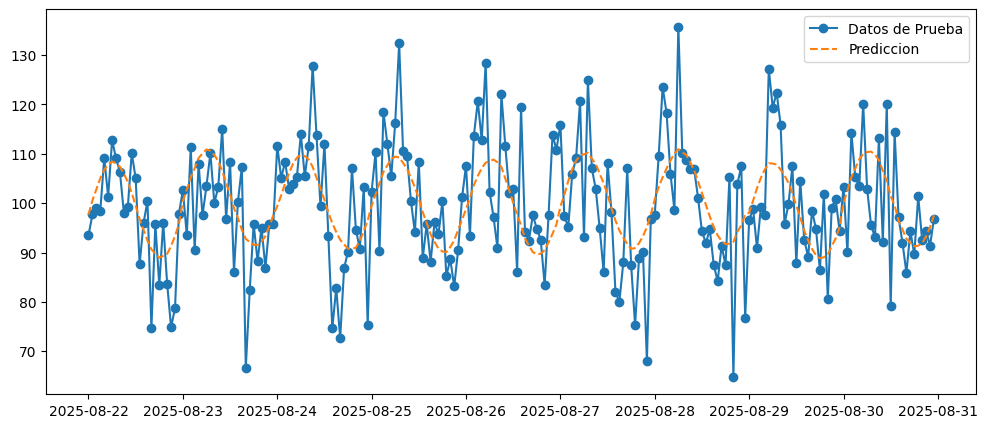

In [35]:
plt.figure(figsize=(12,5))
#plt.plot(df_train['FechaHora'], df_train['Ventas'], label='Entrenamiento')
plt.plot(df_test['FechaHora'], df_test['Ventas'], label='Datos de Prueba', marker='o')
plt.plot(df_test['FechaHora'], y_pred_test, label='Prediccion', linestyle='--')
plt.legend()
plt.show()

In [38]:
for name, coef in zip(X_train.columns, model.coef_):
  print(f"{name}: {coef}")

Hora: -0.009111384084125415
SMA_3: -0.028981051523726653
lag1: -0.009767458771623883
Hora_sin: 9.890388651930158
Hora_cos: -1.0019088735023938
DiaSemana_1: -0.46938209863690067
DiaSemana_2: 0.6159272302626664
DiaSemana_3: 1.307119700236906
DiaSemana_4: -1.309993362173935
DiaSemana_5: 0.9840653232117607
DiaSemana_6: 0.15086885252127077
